In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [2]:
def loss_own(y, x, volume, period, desv_stop=3.1, price_input_test=0, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    volume = abs(volume)
    if (price_input_test <= 0):
        price_input_test=y_test[0]
    
    price_stop_loss, residue = loss_own_residue(y_test, x_test, period, desv_stop=desv_stop, y_short=y_short)
    return -abs(((price_input_test*volume)-(price_stop_loss*volume)))

def loss_own_residue(y, x, period, desv_stop=3.1, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    last_price = y_test[0].copy()
    penny = 0
    while (True):
        penny=round(penny + 0.01, 2)
        if (y_short):
            y_test[0] = last_price + penny
        else:
            y_test[0] = last_price - penny

        residue = mult.zscore(mult.residue(y_test, x_test, period))
        if(abs(residue[0]) >= desv_stop):
            break
    return y_test[0], residue

def gain_own(y, x, volume, period, price_input_test=0, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    volume = abs(volume)
    if (price_input_test <= 0):
        price_input_test=y_test[0]
    
    price_take_profit, residue = gain_own_residue(y_test, x_test, period, y_short=y_short)
    return abs(((price_input_test*volume)-(price_take_profit*volume)))

def gain_own_residue(y, x, period, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    last_price = y_test[0].copy()
    penny = 0
    while (True):
        penny=round(penny + 0.01, 2)
        if (y_short):
            y_test[0] = last_price - penny
            residue = mult.zscore(mult.residue(y_test, x_test, period))
            if(residue[0] <= 0):
                break
        else:
            y_test[0] = last_price + penny
            residue = mult.zscore(mult.residue(y_test, x_test, period))
            if(residue[0] >= 0):
                break

    return y_test[0], residue

In [3]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo_adj.csv'
path_data = 'datasets/data.csv'

In [4]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-07-30
data: (311, 72)
pairs: (2159, 12)


In [5]:
"""y_symbol = 'ELET3'
x_symbol = 'PCAR3'"""

"""y_symbol = 'CMIG4'
x_symbol = 'ENGI11'"""

y_symbol = 'BRKM5'
x_symbol = 'LAME4'

y = data[y_symbol]
x = data[x_symbol]

In [9]:
residues[0]

-2.28343989003074

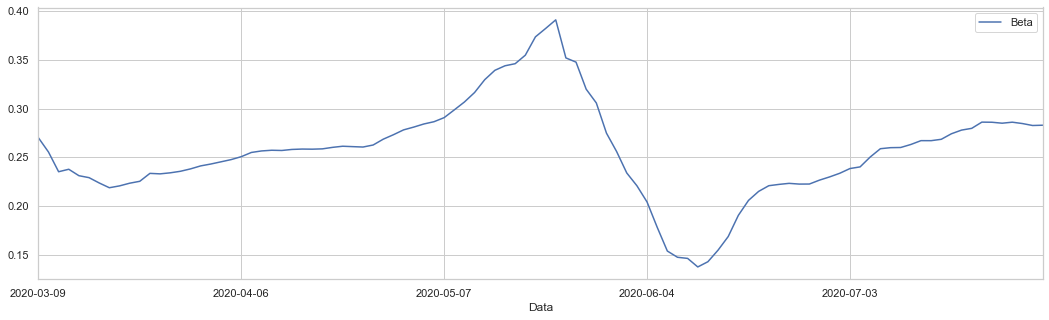

In [8]:
looping = -1
n_recored = 100
period = 50
rows=[]
test=[]
while (looping < (n_recored-1)):
    looping+=1
    dataset = data[looping:]
    y, x = mult.get_values(dataset['CIEL3'], dataset['ITUB4'], period)
    
    coef = mult.coefficients(y, x, period)
    beta = coef['angular']
    beta = coint.beta(y, x)
    
    rows.append([dataset.index[0], beta])
    test.append([looping, y.index[0], y.index[-1], beta])

rolling_beta = pd.DataFrame(rows, columns=['Data', 'Beta'])
rolling_beta.set_index("Data", inplace = True)
rolling_beta[::-1].plot(figsize=(18, 5))
#mult.zscore(rolling_beta[::-1]).plot(figsize=(18, 5))

In [15]:
#rolling_beta

In [16]:
mult.coefficients(data['ENGI11'], data['RENT3'], 250)

{'temp': -0.001969899700550911,
 'angular': 0.6768165731215234,
 'intercept': 20.569156818126967}

In [9]:
test[0:20]

[[0, '2020-07-30', '2020-05-21', 0.2828778671826724],
 [1, '2020-07-29', '2020-05-20', 0.2825895514207069],
 [2, '2020-07-28', '2020-05-19', 0.28458835799825777],
 [3, '2020-07-27', '2020-05-18', 0.285987973530931],
 [4, '2020-07-24', '2020-05-15', 0.28494463938512116],
 [5, '2020-07-23', '2020-05-14', 0.28592096656967547],
 [6, '2020-07-22', '2020-05-13', 0.2860491885744251],
 [7, '2020-07-21', '2020-05-12', 0.279658915961006],
 [8, '2020-07-20', '2020-05-11', 0.27787815551449047],
 [9, '2020-07-17', '2020-05-08', 0.2741090210348377],
 [10, '2020-07-16', '2020-05-07', 0.26842500583579587],
 [11, '2020-07-15', '2020-05-06', 0.2670180916239293],
 [12, '2020-07-14', '2020-05-05', 0.2670429129195572],
 [13, '2020-07-13', '2020-05-04', 0.26310026180249146],
 [14, '2020-07-10', '2020-04-30', 0.26001347150661114],
 [15, '2020-07-09', '2020-04-29', 0.2598334606955248],
 [16, '2020-07-08', '2020-04-28', 0.2587660295096111],
 [17, '2020-07-07', '2020-04-27', 0.25029012909878173],
 [18, '2020-07